# Weather Classification Prediction

### Data Description


Here's a brief description of each column in the weather dataset:

1.	Formatted Date: The date and time of the weather observation.
2.	Summary: A brief textual description of the overall weather conditions.
3.	Precip Type: The type of precipitation (if any), such as rain or snow.
4.	Temperature (C): The air temperature in degrees Celsius.
5.	Apparent Temperature (C): The "feels like" temperature, accounting for factors like humidity and wind.
6.	Humidity: The relative humidity, typically expressed as a percentage.
7.	Wind Speed (km/h): The speed of the wind in kilometers per hour.
8.	Wind Bearing (degrees): The direction the wind is coming from, measured in degrees.
9.	Visibility (km): How far one can see clearly, measured in kilometers.
10.	Pressure (millibars): Atmospheric pressure measured in millibars.
11.	Daily Summary (Target Variable): A more detailed description of the day's weather conditions.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,roc_curve, auc



Read Dataset

In [2]:
weather = pd.read_csv('d:\Weather-Summary-Classification\Dataset\weatherHistory.csv')


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ravia\AppData\Local\Temp\ipykernel_24504\1106076882.py:1: SyntaxWarning: invalid escape sequence '\W'
  weather = pd.read_csv('d:\Weather-Summary-Classification\Dataset\weatherHistory.csv')


In [3]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
weather.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


In [5]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [8]:
weather['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [9]:
weather['Daily Summary'].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                 20085
Partly cloudy throughout the day.                                                  9981
Partly cloudy until night.                                                         6169
Partly cloudy starting in the morning.                                             5184
Foggy in the morning.                                                              4201
                                                                                  ...  
Drizzle until morning.                                                               24
Light rain overnight.                                                                24
Rain until morning.                                                                  24
Rain until afternoon.                                                                24
Foggy starting overnight continuing until morning and breezy in the afternoon.       23
Name: count, Lengt

### Handling misiing values And Data Cleaning

In [10]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
weather.shape

(96453, 11)

In [12]:
weather.dropna(inplace=True)

In [10]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [14]:
weather.to_csv('Cleaned_weather_data.csv', index=False)

### Exploratory data Analysis

1. Temperature by Precipitation Type (Boxplot)

- Snow tends to occur at lower temperatures, while rain is observed in a wider range of temperatures.

C:\Users\ravia\AppData\Local\Temp\ipykernel_24504\384462191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Precip Type", y="Temperature (C)", data=weather, palette="coolwarm")


Text(0.5, 1.0, 'Temperature Distribution by Precipitation Type')

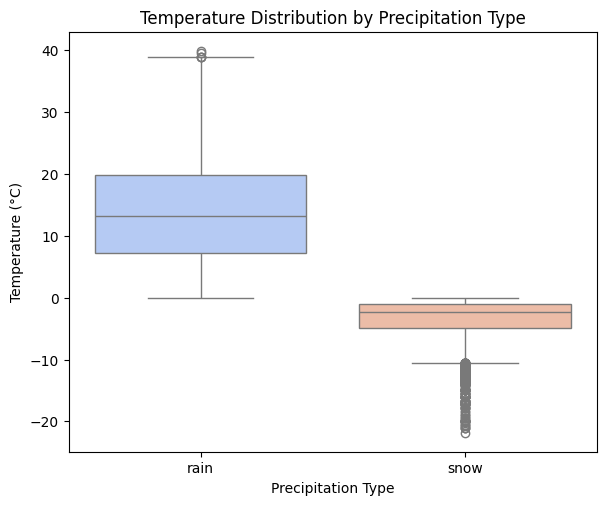

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x="Precip Type", y="Temperature (C)", data=weather, palette="coolwarm")
plt.xlabel("Precipitation Type")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution by Precipitation Type")

2. Visibility vs. Humidity (Scatter Plot)

- Higher humidity is generally associated with lower visibility, which aligns with expectations (fog, mist).

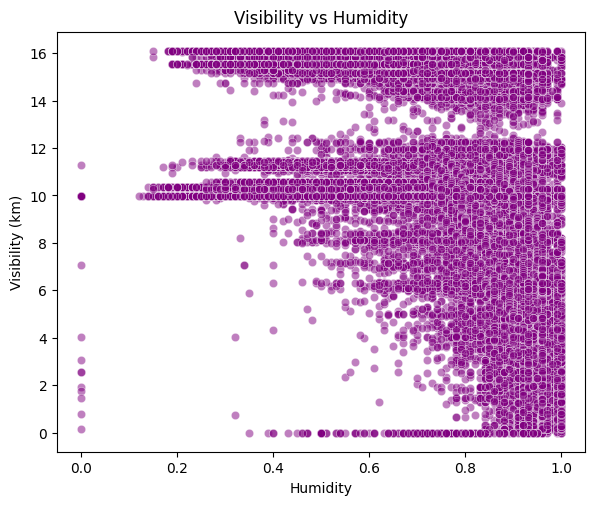

In [16]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 4)
sns.scatterplot(x=weather["Humidity"], y=weather["Visibility (km)"], alpha=0.5, color="purple")
plt.xlabel("Humidity")
plt.ylabel("Visibility (km)")
plt.title("Visibility vs Humidity")
plt.show()

3. Temperature by Precipitation Type

- The plot highlights a clear distinction between rain and snow based on temperature.
- The shaded areas represent the probability density of temperature occurrences for each precipitation type.

C:\Users\ravia\AppData\Local\Temp\ipykernel_24504\2464443349.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather[weather["Precip Type"] == "rain"]["Temperature (C)"], label="Rain", shade=True, color="blue")
C:\Users\ravia\AppData\Local\Temp\ipykernel_24504\2464443349.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather[weather["Precip Type"] == "snow"]["Temperature (C)"], label="Snow", shade=True, color="gray")


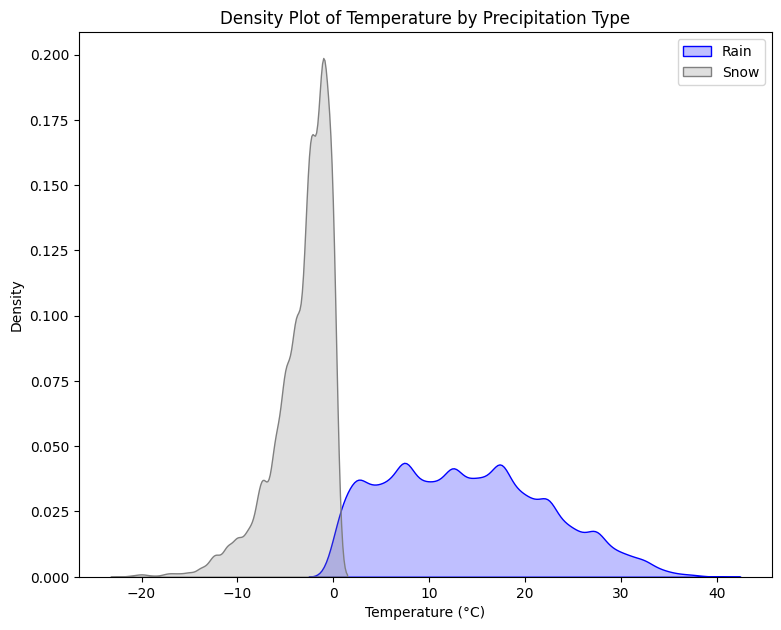

In [17]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 4)
sns.kdeplot(weather[weather["Precip Type"] == "rain"]["Temperature (C)"], label="Rain", shade=True, color="blue")
sns.kdeplot(weather[weather["Precip Type"] == "snow"]["Temperature (C)"], label="Snow", shade=True, color="gray")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Density Plot of Temperature by Precipitation Type")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


4. Count Occurances of Daily summary

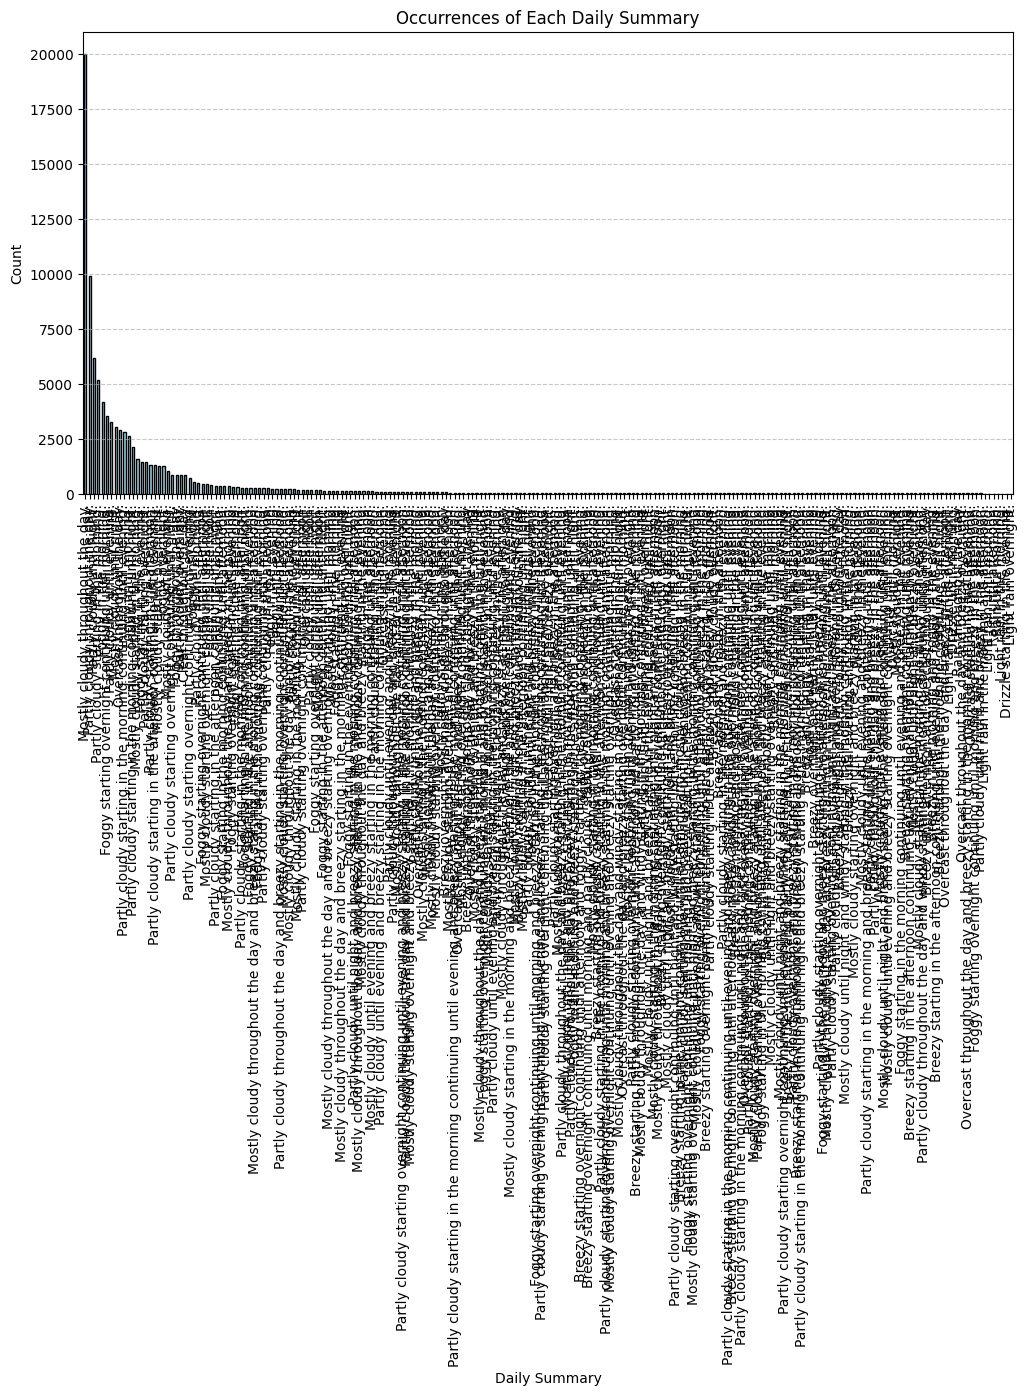

In [18]:
# Count occurrences of each unique daily summary
daily_summary_counts = weather["Daily Summary"].value_counts()

# Plot Bar Chart for Daily Summary occurrences
plt.figure(figsize=(12, 6))
daily_summary_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Daily Summary")
plt.ylabel("Count")
plt.title("Occurrences of Each Daily Summary")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Categorical Encoding

In [21]:

# Encode categorical variables
label_encoders = {}
for column in weather.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    weather[column] = le.fit_transform(weather[column])
    label_encoders[column] = le
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2159,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,197
1,2160,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,197
2,2161,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,197
3,2162,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,197
4,2163,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,197


### Train Test Split    

In [22]:
target_column = 'Daily Summary'  # Replace with the actual column name for weather summary
X = weather.drop(columns=[target_column])
y = weather[target_column]
# Ensure Y is a 1D array
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (95936, 10)
Shape of Y: (95936,)


In [23]:

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Model Selection and Training

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# Model Training: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Model:
Accuracy: 0.7127892432770482


c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           2       1.00      0.67      0.80         6
           3       0.58      0.55      0.57        95
           4       0.66      0.76      0.70       108
           5       0.72      0.74      0.73        77
           6       0.74      0.63      0.68      2161
           8       0.83      0.62      0.71         8
           9       1.00      0.29      0.44         7
          10       0.00      0.00      0.00         3
          11       0.67      0.24      0.35        17
          12       1.00      1.00      1.00      1373
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       1.00      0.69      0.82        13
          17       0.64      0.64      0.64      5566
          18       0.74      0.69      0.71      3332
   

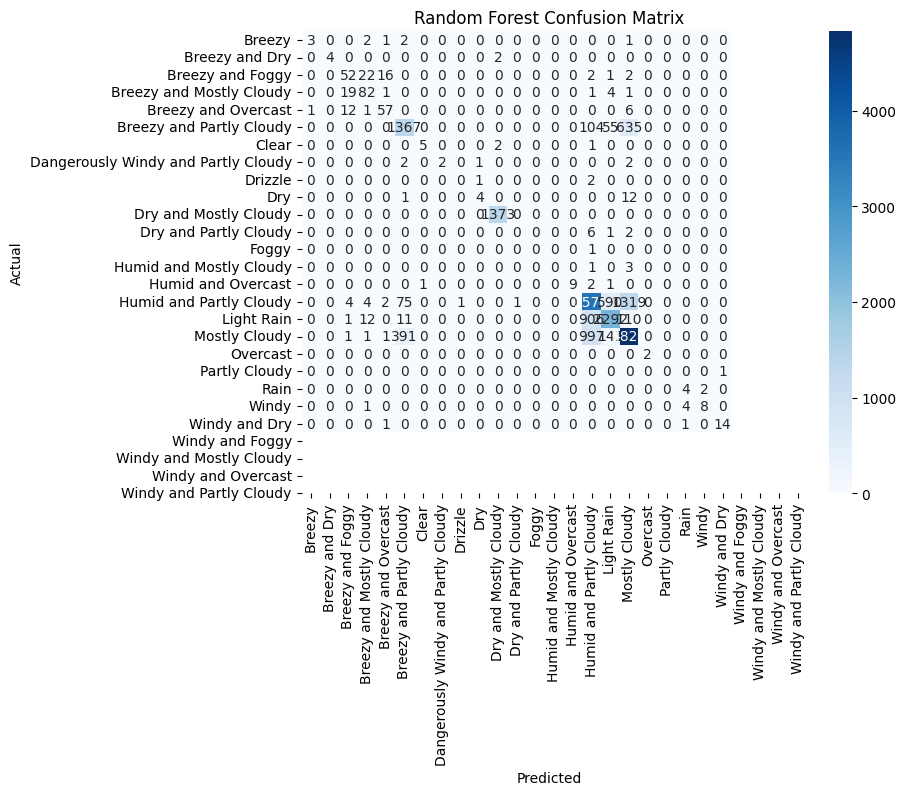


Gradient Boosting Model:
Accuracy: 0.6178861788617886
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.11      0.03         9
           2       0.00      0.00      0.00         6
           3       0.21      0.06      0.10        95
           4       0.36      0.67      0.47       108
           5       0.08      0.06      0.07        77
           6       0.69      0.48      0.57      2161
           8       0.02      0.88      0.05         8
           9       1.00      0.14      0.25         7
          10       0.09      0.67      0.15         3
          11       0.00      0.00      0.00        17
          12       1.00      1.00      1.00      1373
          13       0.67      0.22      0.33         9
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       1.00      0.69      0.82        13
          17       0.53      0.53      0.53      5566
  

c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


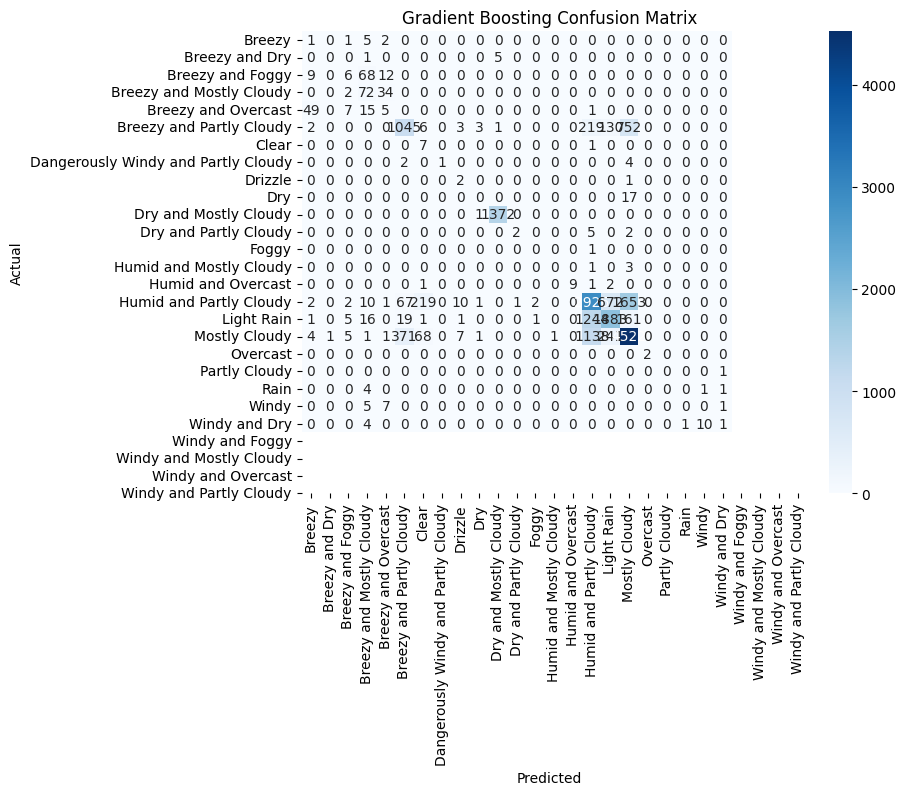


Decision Tree Model:
Accuracy: 0.6308630393996247
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           2       0.83      0.83      0.83         6
           3       0.51      0.52      0.51        95
           4       0.63      0.59      0.61       108
           5       0.64      0.64      0.64        77
           6       0.59      0.60      0.59      2161
           8       0.33      0.50      0.40         8
           9       0.60      0.43      0.50         7
          10       0.00      0.00      0.00         3
          11       0.23      0.18      0.20        17
          12       1.00      1.00      1.00      1373
          13       0.27      0.33      0.30         9
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         4
          16       0.86      0.46      0.60        13
          17       0.56      0.56      0.56      5566
      

c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\an

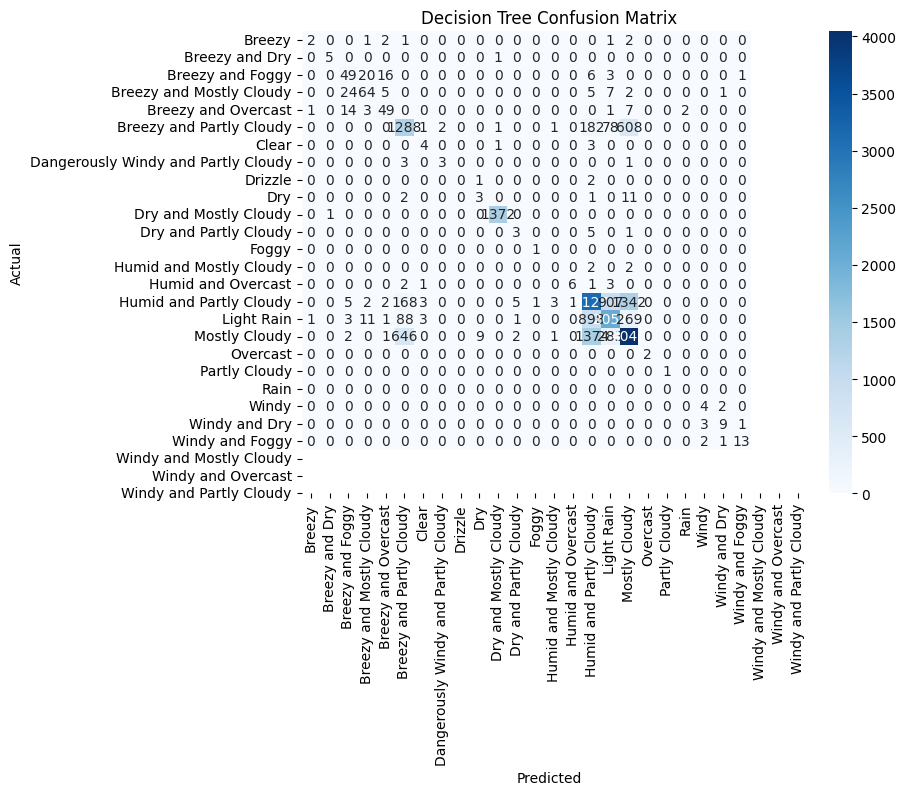


SVC Model:
Accuracy: 0.6013133208255159


c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\BIA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           2       0.60      0.50      0.55         6
           3       0.48      0.53      0.50        95
           4       0.65      0.59      0.62       108
           5       0.74      0.60      0.66        77
           6       0.66      0.23      0.34      2161
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        17
          12       0.92      0.99      0.96      1373
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       1.00      0.15      0.27        13
          17       0.52      0.56      0.54      5566
          18       0.60      0.49      0.54      3332
   

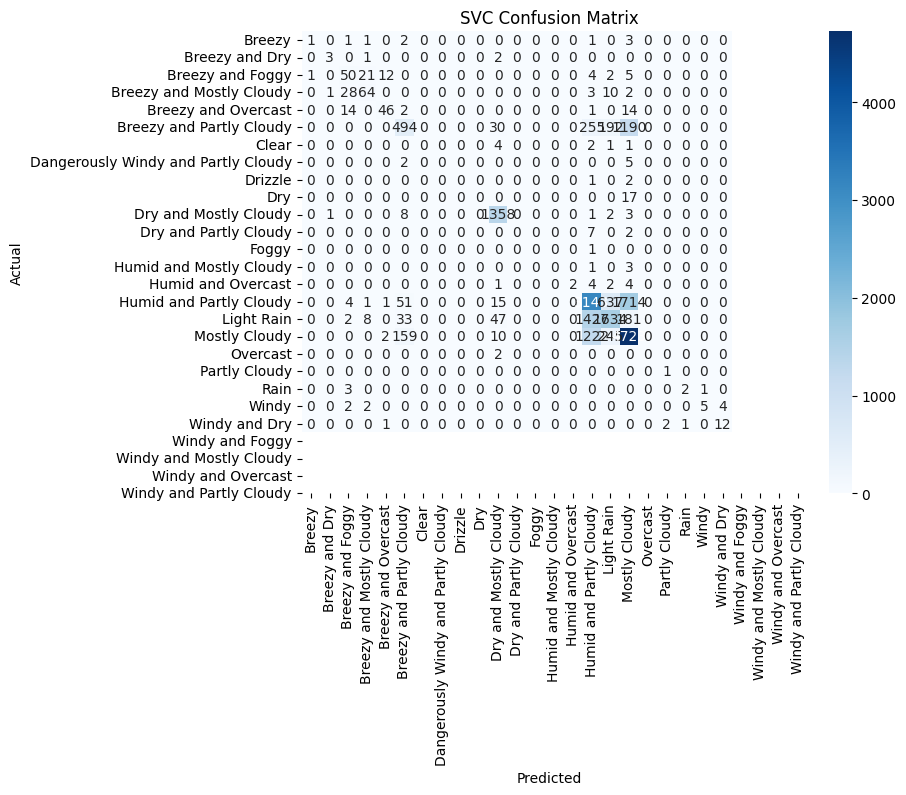

In [19]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    'SVC': SVC(random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Model:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[target_column].classes_, yticklabels=label_encoders[target_column].classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    

In [20]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(X)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

<Axes: >

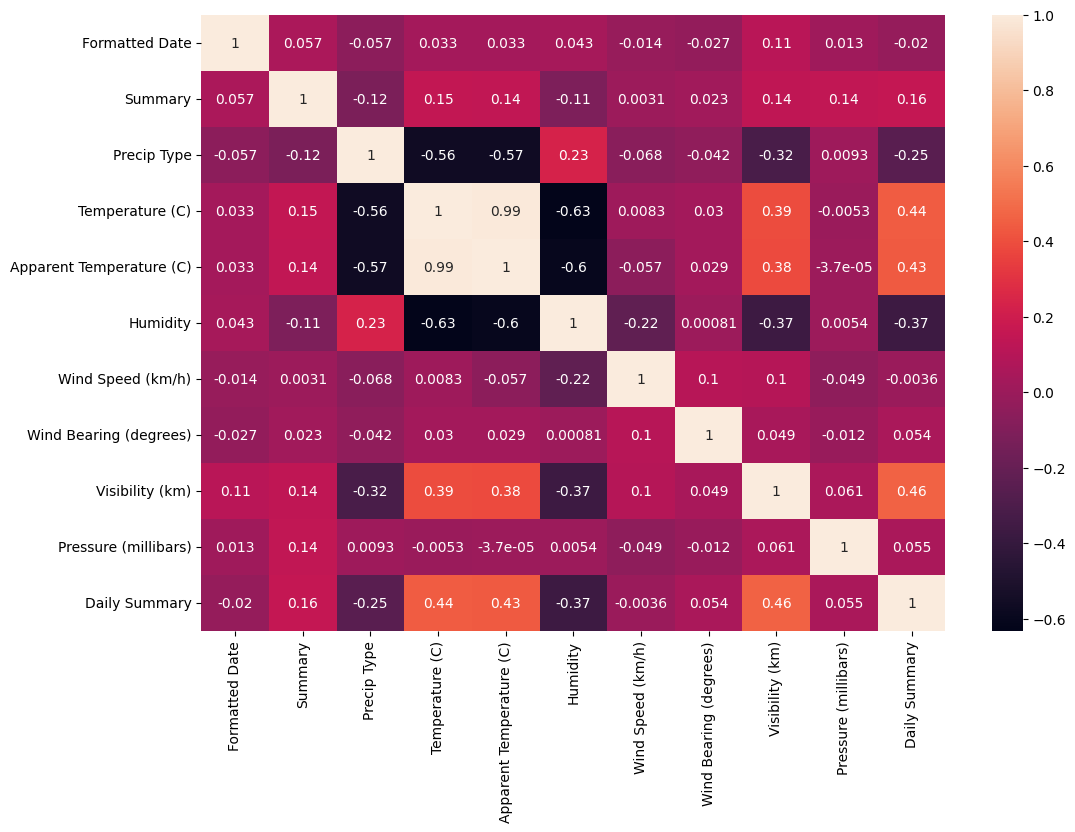

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(weather.corr(), annot = True)

Model Evaluation

In [23]:

clf1 = RandomForestClassifier(random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
min_samples = min(len(X_train), len(y_train))
X_train = X_train[:min_samples]
y_train = y_train[:min_samples]
print(f"Shape of X_train (corrected): {X_train.shape}")
print(f"Shape of y_train (corrected): {y_train.shape}")
clf1.fit(X_train, y_train)


Shape of X_train: (76748, 10)
Shape of y_train: (86342,)
Shape of X_train (corrected): (76748, 10)
Shape of y_train (corrected): (76748,)


RandomForestClassifier(random_state=42)

In [25]:
# Example data (replace X_train, y_train, X_test, y_test with your actual data)
clf1 = RandomForestClassifier()

# Fit the classifier to the training data
clf1.fit(X_train, y_train)

# Now you can make predictions
y_pred = clf1.predict(X_test)

# Calculate accuracy
accuracy_clf1 = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy_clf1:.2f}")

Accuracy of RandomForestClassifier: 0.71


In [26]:
# Example data (replace X_train, y_train, X_test, y_test with your actual data)
clf2 = GradientBoostingClassifier()

# Fit the classifier to the training data
clf2.fit(X_train, y_train)

# Now you can make predictions
y_pred = clf2.predict(X_test)

# Calculate accuracy
accuracy_clf2 = accuracy_score(y_test, y_pred)
print(f"Accuracy of GradientBoostingClassifie: {accuracy_clf2:.2f}")


Accuracy of GradientBoostingClassifie: 0.63


In [28]:
# Example data (replace X_train, y_train, X_test, y_test with your actual data)
clf3 = SVC()
clf3.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf3.predict(X_test)
accuracy_clf3 = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVC: {accuracy_clf3:.2f}")


Accuracy of SVC: 0.60


In [30]:
# Train the model
clf4 = DecisionTreeClassifier()
clf4.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf4.predict(X_test)
accuracy_clf4 = accuracy_score(y_test, y_pred)
print(f"Accuracy of DecisionTreeClassifier: {accuracy_clf4:.2f}")


Accuracy of DecisionTreeClassifier: 0.63


Feature Importances (Tree - Based Models)

In [31]:
importances = clf1.feature_importances_
print(importances)

[0.10973417 0.00333705 0.08544862 0.08190405 0.09049845 0.10135946
 0.07979247 0.16171574 0.10058689 0.18562309]


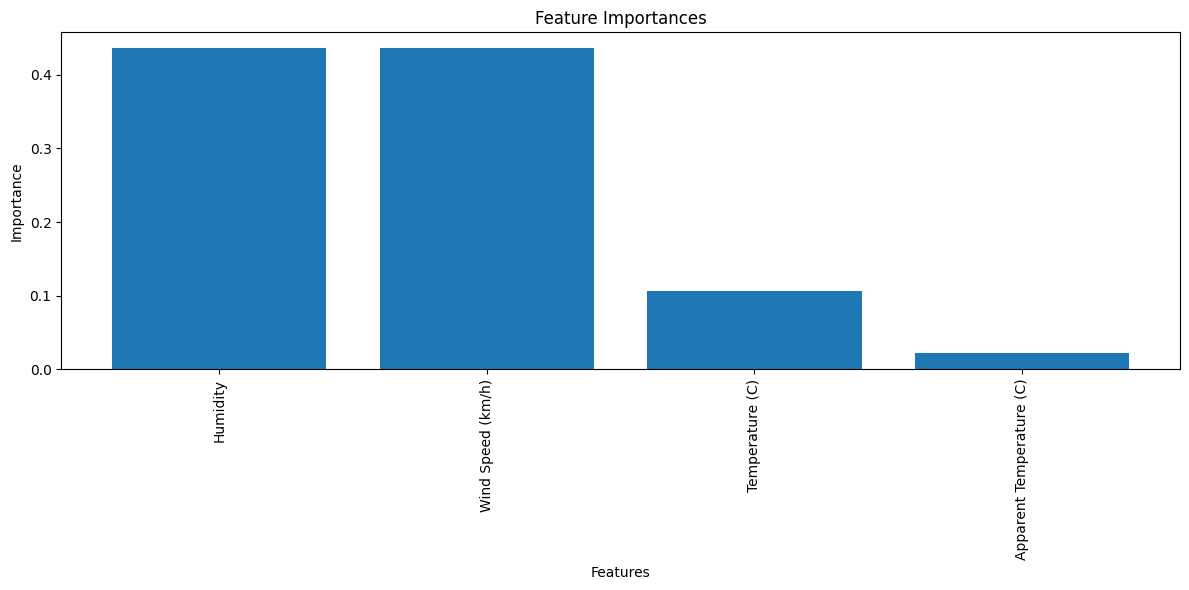

In [ ]:

X, y = weather.data, weather.target
features =  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                      'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                      'Visibility (km)', 'Pressure (millibars)'] # Get feature names from the dataset

# Sort by importance
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]  # Feature names sorted by importance

# Plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



Results and Visualization

,Model,Accuracy_score
0,Random Forest,0.713258
1,GradientBoosting,0.633417
3,Decision Tree,0.628309
2,SVC,0.601313


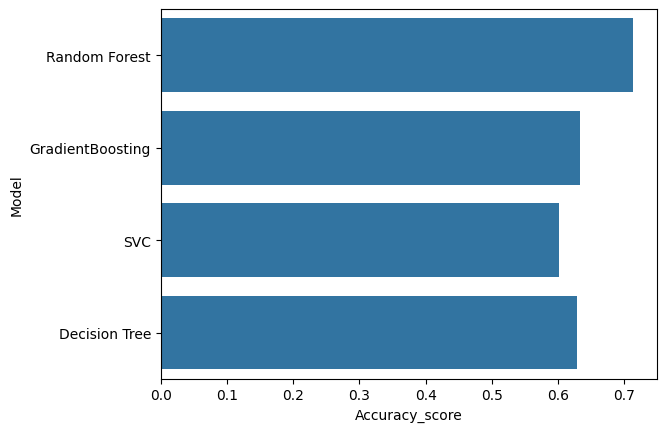

In [35]:
models = pd.DataFrame({
    'Model':['Random Forest','GradientBoosting','SVC' ,'Decision Tree'],
    'Accuracy_score' :[accuracy_clf1, accuracy_clf2, accuracy_clf3, accuracy_clf4]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)